In [36]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Input,Dense, SimpleRNN, Embedding, TimeDistributed, Bidirectional
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.models import Model

In [37]:
# preparing dataset

file1 = open("/NER_train.txt", "r")
X = [] # contains the words
Y = [] # contains corresponding tags
x = []
y = []
for i in file1:
  s = i.split(" ")
  if s[0]!='.' and len(s)==4:
    x.append(s[0])
    y.append(s[3][:-1])
  else:
    X.append(x)
    Y.append(y)
    x = []
    y = []
# print(X)
print(Y)

[['O'], ['I-ORG', 'O', 'I-MISC', 'O', 'O', 'O', 'I-MISC', 'O'], [], ['I-PER', 'I-PER'], ['I-LOC', 'O'], ['O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['I-LOC', 'O', 'O', 'O', 'O', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'O', 'O', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'I-ORG'], [], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'O', 'O', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], [], ['I-PER', 'O',

In [38]:
unique_words = len(set([word.lower() for sentence in X for word in sentence]))
print(unique_words)

21009


In [40]:
# to find the different types of tags
total_tags   = len(set([word.lower() for sentence in Y for word in sentence]))
print(total_tags)

8


In [41]:
# code to vectorize X and Y

# encoding X
word_tokenizer = Tokenizer()              # instantiate tokeniser
word_tokenizer.fit_on_texts(X)            # fit tokeniser on data
# use the tokeniser to encode input sequence
X_encd = word_tokenizer.texts_to_sequences(X)  

# encoding Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encd = tag_tokenizer.texts_to_sequences(Y)

# look at first encoded data point

print('X: ', X_encd[1])
print('Y: ', Y_encd[1])

X:  [988, 10950, 204, 628, 5, 3938, 215, 5773]
Y:  [3, 1, 5, 1, 1, 1, 5, 1]


In [42]:
# check length of longest sentence
longest = [len(seq) for seq in X_encd]
print("longest sentence: {}".format(max(longest)))

longest sentence: 113


In [43]:
# Pad Sequences

# we set a particular sentence length (max_length)
# sentences longer than max_length - truncated from the back
# sentences shorter than max_length - padded with zeros in front

max_length = 90

X_padded = pad_sequences(X_encd, maxlen= max_length, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encd, maxlen= max_length, padding="pre", truncating="post")
# print the first sequence
print(X_padded[0])
print(Y_padded[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [44]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded

In [45]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)
Y.shape

(22360, 90, 9)

In [46]:
# split entire data into training and testing sets
ts = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ts, random_state=5)

In [47]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train.shape

(19006, 90)

In [48]:
Y_train.shape

(19006, 90, 9)

In [49]:
# total number of tags
tot_tags = Y.shape[2]
tot_tags

9

In [50]:
rnn_model = Sequential()

# embedding layer
rnn_model.add(Embedding(input_dim     =  21010,         # vocab size
                        output_dim    =  90,          # length of each sentence
                        input_length  =  113,          # max_length
                        trainable     =  False          
))

# adding RNN layer
rnn_model.add(SimpleRNN(64, return_sequences=True ))
rnn_model.add(SimpleRNN(128, return_sequences=True , activation = 'sigmoid'))
rnn_model.add(SimpleRNN(256, return_sequences=True , activation = 'relu'))


# adding time distributed layer
rnn_model.add(TimeDistributed(Dense(tot_tags, activation='softmax')))

In [51]:
rnn_model.compile(loss = 'categorical_crossentropy', optimizer =  'adam', metrics   =  ['accuracy'])

In [53]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
149/149 [==============================] - 60s 386ms/step - loss: 0.4869 - accuracy: 0.8884 - val_loss: 1.5982 - val_accuracy: 0.9008
Epoch 2/10
149/149 [==============================] - 55s 366ms/step - loss: 1.5704 - accuracy: 0.9026 - val_loss: 1.5984 - val_accuracy: 0.9008
Epoch 3/10
149/149 [==============================] - 58s 387ms/step - loss: 1.5941 - accuracy: 0.9011 - val_loss: 1.5984 - val_accuracy: 0.9008
Epoch 4/10
149/149 [==============================] - 54s 360ms/step - loss: 1.5627 - accuracy: 0.9031 - val_loss: 1.5984 - val_accuracy: 0.9008
Epoch 5/10
149/149 [==============================] - 57s 384ms/step - loss: 1.5541 - accuracy: 0.9036 - val_loss: 1.5984 - val_accuracy: 0.9008
Epoch 6/10
149/149 [==============================] - 55s 369ms/step - loss: 1.5658 - accuracy: 0.9029 - val_loss: 1.5984 - val_accuracy: 0.9008
Epoch 7/10
149/149 [==============================] - 56s 375ms/step - loss: 1.5688 - accuracy: 0.9027 - val_loss: 1.5984 - val_ac

In [54]:
rnn_model.save('rnn_model.bin')

INFO:tensorflow:Assets written to: rnn_model.bin/assets


In [64]:
rnn_model.save_weights("rnn_ner_model")

In [65]:
rnn_training.history['accuracy']

[0.9399230480194092,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327,
 0.9022355675697327]

In [62]:
rnn_training.history['val_accuracy']

[0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961,
 0.9008281826972961]

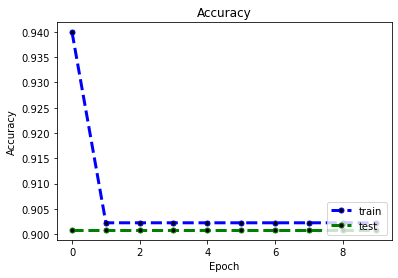

In [63]:
plt.plot(rnn_training.history['accuracy'], linestyle='dashed',color='blue',linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.plot(rnn_training.history['val_accuracy'], linestyle='dashed',color='green', linewidth = 3, marker='o', markerfacecolor='black', markersize=5)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [66]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: ",loss)
print("Accuracy: ", accuracy)

105/105 [==============================] - 5s 46ms/step - loss: 1.5984 - accuracy: 0.9008
Loss:  1.598445177078247
Accuracy:  0.9008281826972961
